# Analiza danych strumieniowych z użyciem uczenia maszynoweg

## Architektura

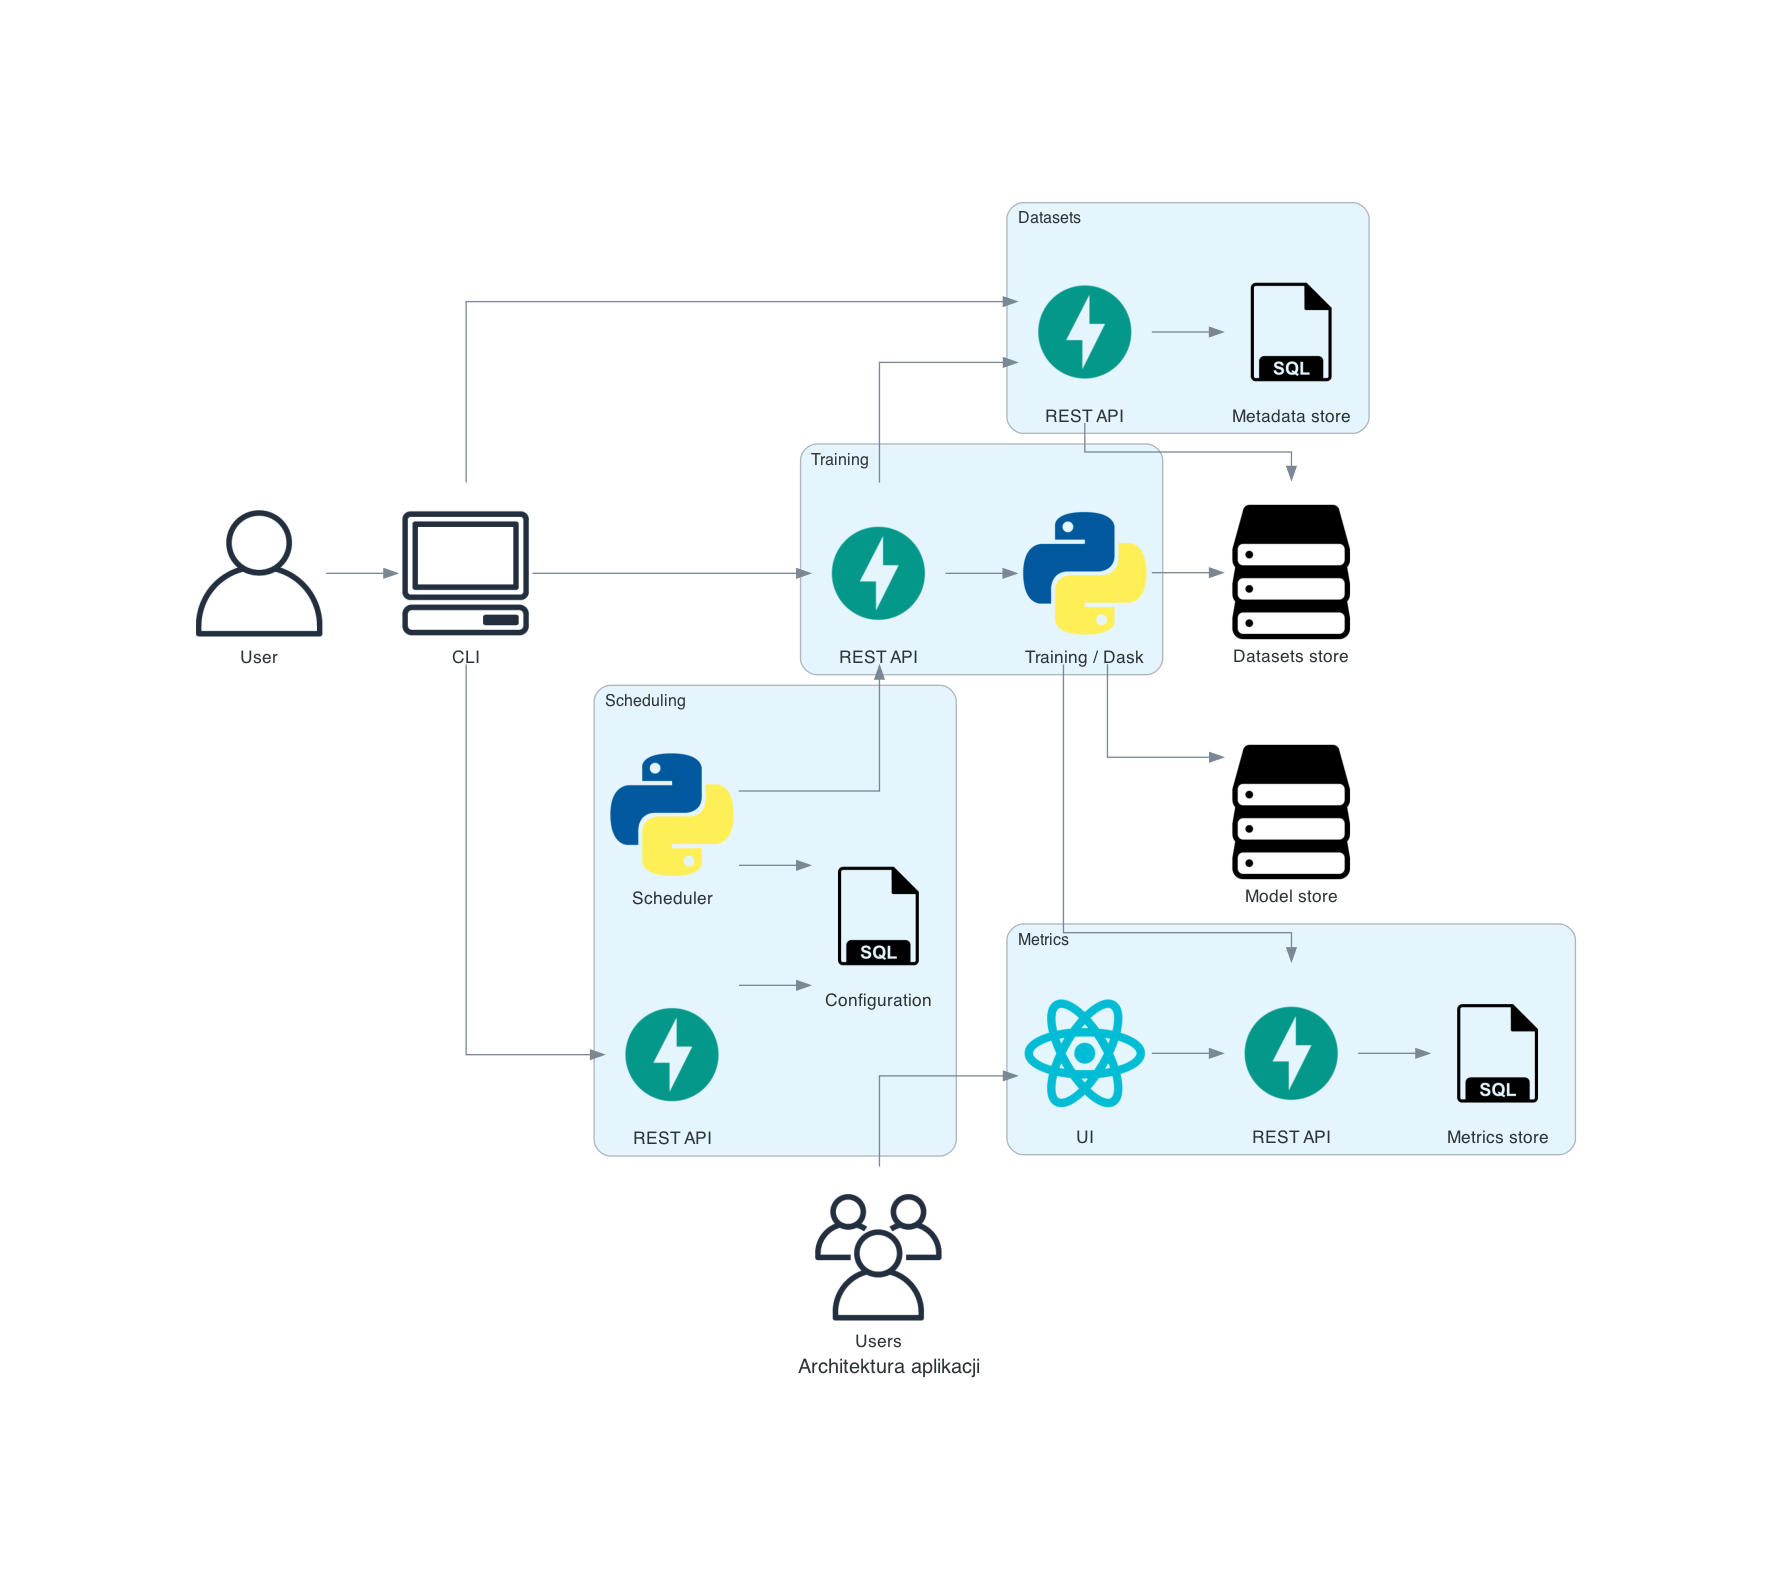

In [47]:
from diagrams import Cluster, Diagram
from diagrams.generic.database import SQL
from diagrams.generic.storage import Storage
from diagrams.onprem.client import Client, User, Users
from diagrams.programming.language import Python
from diagrams.programming.framework import FastAPI, React

with Diagram("Architektura aplikacji", filename="architecture", show=False) as diag:
    user = User("User")
    cli = Client("CLI")
    users = Users("Users")
    models_store = Storage("Model store")
    datasets_store = Storage("Datasets store")
    
    with Cluster("Datasets"):
        datasets_rest_api = FastAPI("REST API")
        datasets_metadata = SQL("Metadata store")
        
    with Cluster("Metrics"):
        metrics_ui = React("UI")
        metrics_rest_api = FastAPI("REST API")
        metrics_db = SQL("Metrics store")
        
    with Cluster("Training"):
        training_rest_api = FastAPI("REST API")
        training_dask = Python("Training / Dask")  

    with Cluster("Scheduling"):
        scheduling_rest_api = FastAPI("REST API")
        scheduling_app = Python("Scheduler")
        scheduling_db = SQL("Configuration")

    # Data sets
    datasets_rest_api >> datasets_metadata
    datasets_rest_api >> datasets_store

    # Training
    training_rest_api >> datasets_rest_api
    training_rest_api >> training_dask
    training_dask >> models_store
    training_dask >> metrics_rest_api
    training_dask >> datasets_store
        
    # Scheduling
    scheduling_rest_api >> scheduling_db
    scheduling_app >> scheduling_db
    scheduling_app >> training_rest_api

    # Model Metrics
    metrics_ui >> metrics_rest_api
    metrics_rest_api >> metrics_db

    # CLI
    cli >> scheduling_rest_api
    cli >> training_rest_api
    cli >> datasets_rest_api

    user >> cli
    users >> metrics_ui
diag 


## Funkcjonalność

- CLI
  - konfiguracja harmonogramu trenowania
  - uruchamianie trenowania modelu na żądanie
  - dodawanie nowych zbiorów danych
- Zbiory danych
  - odczyt/zapis za pomocą REST API
  - możliwość pobrania najnowszego zbioru danych
- Harmonogram
  - możliwość konfiguracji za pomocą REST API 
  - uruchamianie trenowania wg konfiguracji
- Trenowanie
  - możliwość uruchomienia za pomocą REST API
  - zapis modelu w postaci binarnej na dysk
  - zapis metryk
- Metryki
  - możliwość wyświetlenia za pomocą UI
  - możliwość odczytu/zapisu za pomocą REST API